# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification with Multi-layer Perceptrons

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

In [78]:
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
from math import sqrt
import nnFunctions
import importlib
from collections import Counter
%matplotlib inline

In [3]:
# run this cell if you modified the nnFunctions.py file and you wish to reload the module
importlib.reload(nnFunctions)

<module 'nnFunctions' from 'C:\\Users\\yikai\\OneDrive\\Desktop\\CSE574\\Assignment2\\nnFunctions.py'>

In [4]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [5]:
# load data
train_data,train_label,test_data,test_label = pickle.load(open('AI_quick_draw_sm.pickle','rb'))

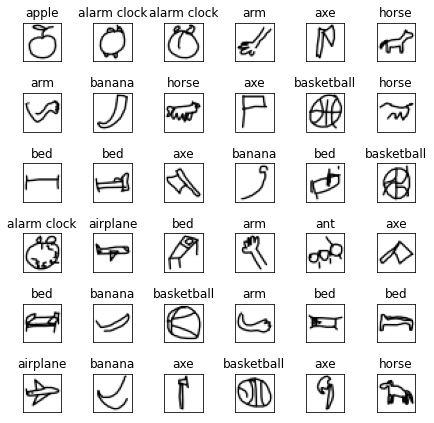

In [24]:
# visualize some images
fig = plt.figure(figsize=[6,6])
for i in range(36):
    ax = plt.subplot(6,6,i+1)    
    ind = np.random.randint(0,train_data.shape[0])
    plt.imshow(train_data[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(train_label[ind])])
plt.tight_layout()

In [109]:
#  Train Neural Network
# set the number of nodes in input unit (not including bias unit)
n_input = train_data.shape[1]

# set the number of nodes in hidden unit or M (not including bias unit)
n_hidden = 90 # you can modify this parameter

# set the number of nodes in output unit
n_class = len(np.unique(train_label)) # this parameter is fixed

# initialize the weights into some random matrices
initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

# unroll 2 weight matrices into single column vector
initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

# set the regularization hyper-parameter
lambdaval = 4 # you can modify this parameter

args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

# Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
# Check documentation for a working example
opts = {'maxiter': 50}  # Preferred value.
st = time.time()
nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
en = time.time()
# Reshape nnParams from 1D vector into W1 and W2 matrices
W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
print("Training completed in {:.2f} seconds.".format(en-st))

# Test the computed parameters
mis_train=[]
mis_test=[]
mis_predict=[]
# find the accuracy on Training Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
print('Training set Accuracy: {:.2f}%'.format(100 * np.mean((predicted_label == train_label.astype(float)))))
for i in range(len(predicted_label)):
    if (predicted_label[i]!=train_label[i].astype(float)):
        mis_train.append(train_label[i])
mis_train_counts = Counter(mis_train)
label_1 = mis_train_counts.most_common(1)[0][0]
counts_1 = mis_train_counts.most_common(1)[0][1]
print("The objects in train set most mistakes making on : " + str(classes[label_1.astype(int)]) + ", mistakes rate is " + str(100*(round(counts_1/len(mis_train),2) ))+"%" )
# find the accuracy on Testing Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
print('Test set Accuracy    : {:.2f}%'.format(100 * np.mean((predicted_label == test_label.astype(float)))))
for i in range(len(predicted_label)):
    if (predicted_label[i]!=train_label[i].astype(float)):
        mis_test.append(test_label[i])
mis_test_counts = Counter(mis_test)
label_2 = mis_test_counts.most_common(1)[0][0]
counts_2 = mis_test_counts.most_common(1)[0][1]
print("The objects in test set most mistakes making on : " + str(classes[label_2.astype(int)]) + ", mistakes rate is " + str(100*(round(counts_2/len(mis_test),2) ))+"%" )


Training completed in 16.21 seconds.
Training set Accuracy: 70.57%
The objects in train set most mistakes making on : arm, mistakes rate is 24.0%
Test set Accuracy    : 66.08%
The objects in test set most mistakes making on : arm, mistakes rate is 22.0%


In [48]:
def optimalM(M):
    n_input = train_data.shape[1]
    running_time = []
    train_acc = []
    test_acc = []
    for i in range(len(M)):
        n_hidden = M[i] # Parameter can modify
        lambdaval = 0.5 
        n_class = len(np.unique(train_label))
        initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
        initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)
        initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)
        args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)
        opts = {'maxiter': 50}  # Preferred value.
        st = time.time()
        nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
        en = time.time()
        W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
        W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
        running_time.append(round(en-st,2))
        predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
        traacc=100 * np.mean((predicted_label == train_label.astype(float)))
        train_acc.append(round(traacc,2))
        predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
        testacc = 100 * np.mean((predicted_label == test_label.astype(float)))
        test_acc.append(round(testacc,2))
        
    x = M
    k1 = train_acc 
    k2 = test_acc 
    k3 = running_time
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(x,k1,'s-',color = 'r',label="Train Accuracy")
    ax1.plot(x,k2,'o-',color = 'g',label="Test Accuracy")
    ax2.plot(x,k3,color = 'b',label="Run Time")
    ax1.set_xlabel("Number of hidden nodes(with lambda=0.5)")
    ax1.set_ylabel("Accuracy in percent")
    ax2.set_ylabel("Time in second")
    ax1.legend(loc = 4)
    ax2.legend(loc = 2)
    plt.show()

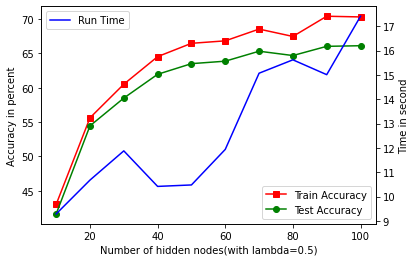

In [49]:
optimalM([10,20,30,40,50,60,70,80,90,100])

In [52]:
def optimalL(L):
    n_input = train_data.shape[1]
    running_time = []
    train_acc = []
    test_acc = []
    for i in range(len(L)):
        n_hidden = 90 # Optimal Parameter 
        lambdaval = L[i] 
        n_class = len(np.unique(train_label))
        initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
        initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)
        initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)
        args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)
        opts = {'maxiter': 50}  # Preferred value.
        st = time.time()
        nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
        en = time.time()
        W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
        W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
        running_time.append(round(en-st,2))
        predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
        traacc=100 * np.mean((predicted_label == train_label.astype(float)))
        train_acc.append(round(traacc,2))
        predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
        testacc = 100 * np.mean((predicted_label == test_label.astype(float)))
        test_acc.append(round(testacc,2))
        
    x = L
    k1 = train_acc 
    k2 = test_acc 
    k3 = running_time
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(x,k1,'s-',color = 'r',label="Train Accuracy")
    ax1.plot(x,k2,'o-',color = 'g',label="Test Accuracy")
    ax2.plot(x,k3,color = 'b',label="Run Time")
    ax1.set_xlabel("Regularization parameter(with 90 hidden layers)")
    ax1.set_ylabel("Accuracy in percent")
    ax2.set_ylabel("Time in second")
    ax1.legend(loc = 3)
    ax2.legend(loc = 1)
    plt.show()

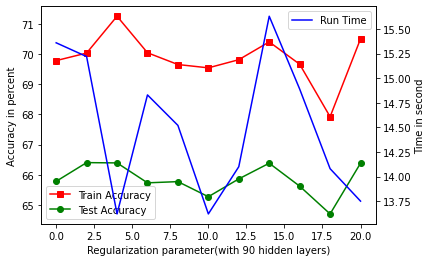

In [53]:
optimalL([0,2,4,6,8,10,12,14,16,18,20])

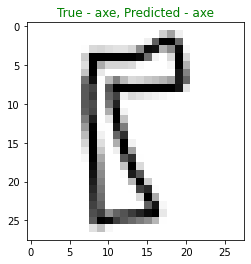

In [75]:
# visualize prediction on a random image
rnd_ind = np.random.randint(test_label.shape[0])
predicted_label = nnFunctions.nnPredict(W1,W2,test_data[rnd_ind:rnd_ind+1,:])
if predicted_label[0] == test_label[rnd_ind]:
    params = {"text.color" : "green"}
else:
    params = {"text.color" : "red"}
plt.rcParams.update(params)

plt.imshow(test_data[rnd_ind,:].reshape((28,28)),cmap='Greys')
t = plt.title('True - {}, Predicted - {}'.format(classes[int(test_label[rnd_ind])],classes[int(predicted_label[0])]))